In [397]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [398]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [399]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [400]:
train.drop(columns=['Cabin'], inplace=True)
test.drop(columns=['Cabin'], inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [401]:
train.fillna({'Age': train['Age'].mean(), 'Embarked': 'S'}, inplace=True)
test.fillna({'Age': test['Age'].mean(), 'Embarked': 'S'}, inplace=True)
#train.dropna(subset=['Age', 'Embarked'], inplace=True)
#test.dropna(subset=['Age', 'Embarked'], inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [402]:
print(train.Sex.unique())

['male' 'female']


In [403]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [404]:
def change_name(df):
    df['Name'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

    title_mapping = {
    'Mr': 1,
    'Miss': 2,
    'Mrs': 3,
    'Master': 4,
    'Dr': 5,
    'Rev': 6,
    'Col': 7,
    'Major': 8,
    'Mlle': 9,
    'Countess': 10,
    'Ms': 11,
    'Lady': 12,
    'Jonkheer': 13,
    'Don': 14,
    'Capt': 15,
}

    df['Name'] = df['Name'].map(title_mapping).astype('Int64')
    df['Name'].fillna(0, inplace=True)
    return df

train=change_name(train)
test=change_name(test)
print(train['Name'].unique())
train.head()

<IntegerArray>
[1, 3, 2, 4, 14, 6, 5, 0, 11, 8, 12, 9, 7, 15, 13]
Length: 15, dtype: Int64


C:\Users\lenovo\AppData\Local\Temp\ipykernel_22400\2112730176.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Name'].fillna(0, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_22400\2112730176.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,3,1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,2,1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,3,1,35.0,1,0,113803,53.1000,0
4,5,0,3,1,0,35.0,0,0,373450,8.0500,0


In [405]:
print(train['Ticket'].unique().shape)

(681,)


In [406]:
train.drop(columns=['Ticket'], inplace=True)
test.drop(columns=['Ticket'], inplace=True)
train.info()
train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    Int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    int64  
dtypes: Int64(1), float64(2), int64(7)
memory usage: 70.6 KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,0,22.000000,1,0,7.2500,0
1,2,1,1,3,1,38.000000,1,0,71.2833,1
2,3,1,3,2,1,26.000000,0,0,7.9250,0
3,4,1,1,3,1,35.000000,1,0,53.1000,0
4,5,0,3,1,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,6,0,27.000000,0,0,13.0000,0
887,888,1,1,2,1,19.000000,0,0,30.0000,0
888,889,0,3,2,1,29.699118,1,2,23.4500,0
889,890,1,1,1,0,26.000000,0,0,30.0000,1


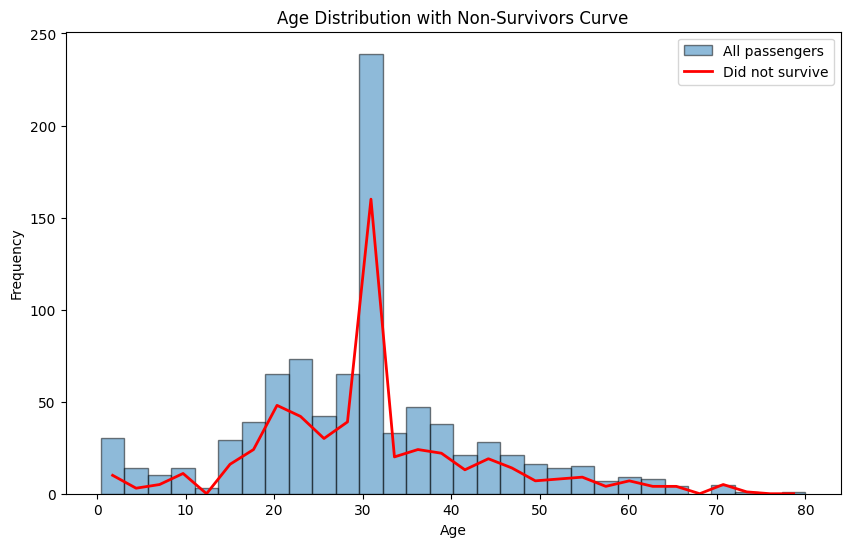

In [407]:
plt.figure(figsize=(10,6))

counts, bins, patches = plt.hist(train['Age'].dropna(), bins=30, edgecolor='black', alpha=0.5, label='All passengers')

non_survived_ages = train.loc[train['Survived'] == 0, 'Age'].dropna()
non_survived_counts, _ = np.histogram(non_survived_ages, bins=bins)

bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.plot(bin_centers, non_survived_counts, color='red', label='Did not survive', linewidth=2)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution with Non-Survivors Curve')
plt.legend()
plt.show()

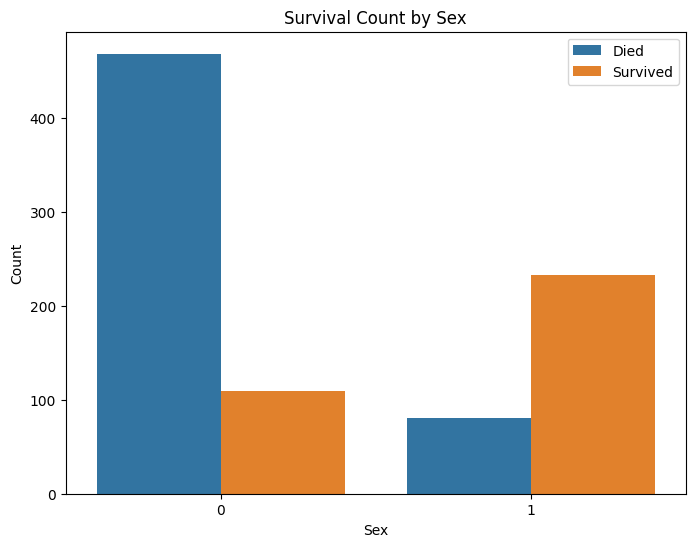

In [408]:
plt.figure(figsize=(8,6))

sns.countplot(data=train, x='Sex', hue='Survived')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival Count by Sex')
plt.legend(labels=['Died', 'Survived'])
plt.show()

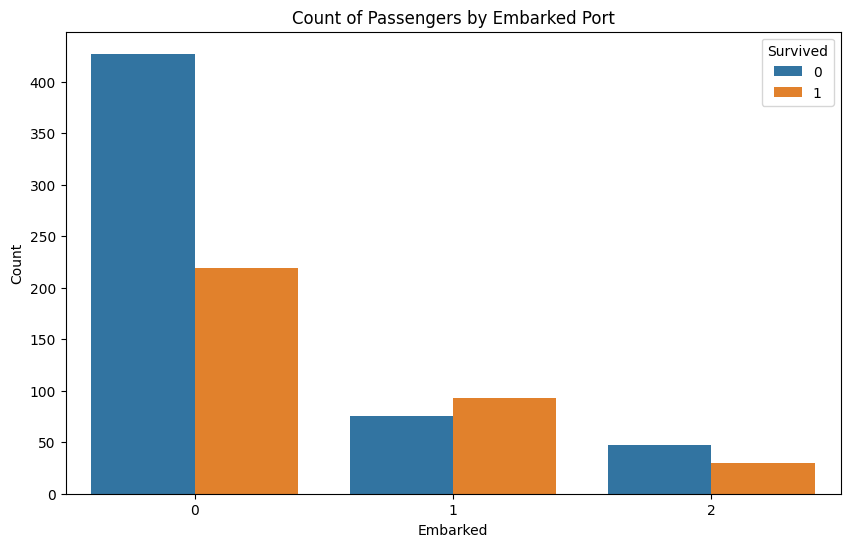

In [409]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='Embarked', hue='Survived')

plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Count of Passengers by Embarked Port')
plt.show()

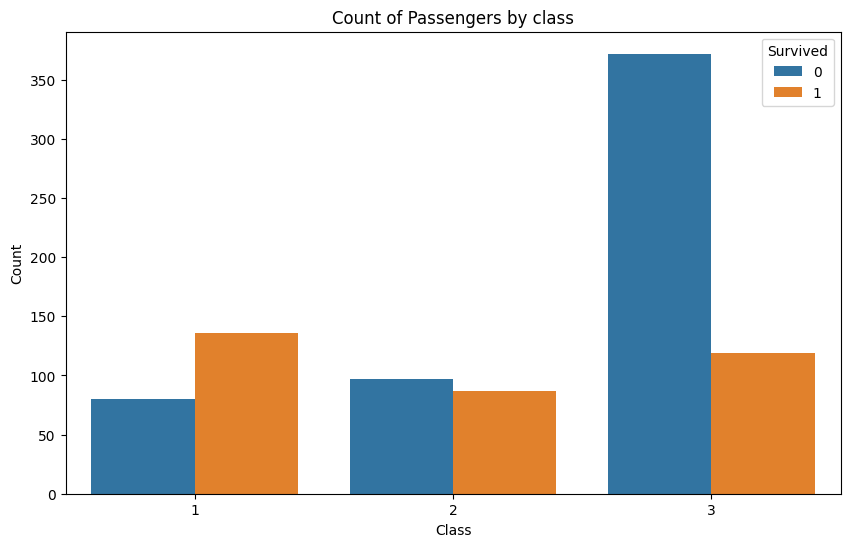

In [410]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='Pclass', hue='Survived')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Passengers by class')
plt.show()

In [411]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,0,22.000000,1,0,7.2500,0
1,2,1,1,3,1,38.000000,1,0,71.2833,1
2,3,1,3,2,1,26.000000,0,0,7.9250,0
3,4,1,1,3,1,35.000000,1,0,53.1000,0
4,5,0,3,1,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,6,0,27.000000,0,0,13.0000,0
887,888,1,1,2,1,19.000000,0,0,30.0000,0
888,889,0,3,2,1,29.699118,1,2,23.4500,0
889,890,1,1,1,0,26.000000,0,0,30.0000,1


In [412]:
print(train.SibSp.unique())
print(train.Parch.unique())

[1 0 3 4 2 5 8]
[0 1 2 5 3 4 6]


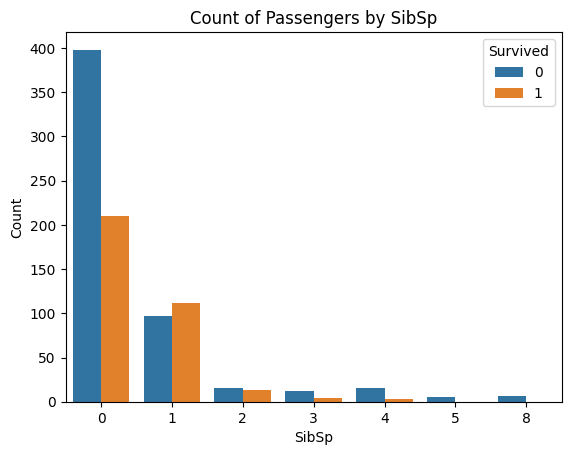

In [413]:
plt.Figure(figsize=(10, 6))
sns.countplot(data=train, x='SibSp', hue='Survived')

plt.xlabel('SibSp')
plt.ylabel('Count')
plt.title('Count of Passengers by SibSp')
plt.show()


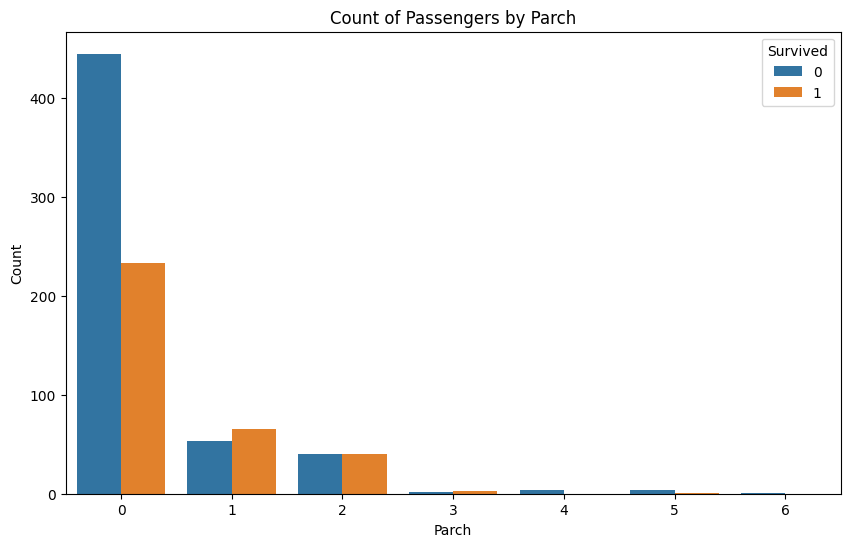

In [414]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='Parch', hue='Survived')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.title('Count of Passengers by Parch')
plt.show()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
family_size    0
dtype: int64


C:\Users\lenovo\AppData\Local\Temp\ipykernel_22400\2586078381.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(test['Fare'].mean(), inplace=True)


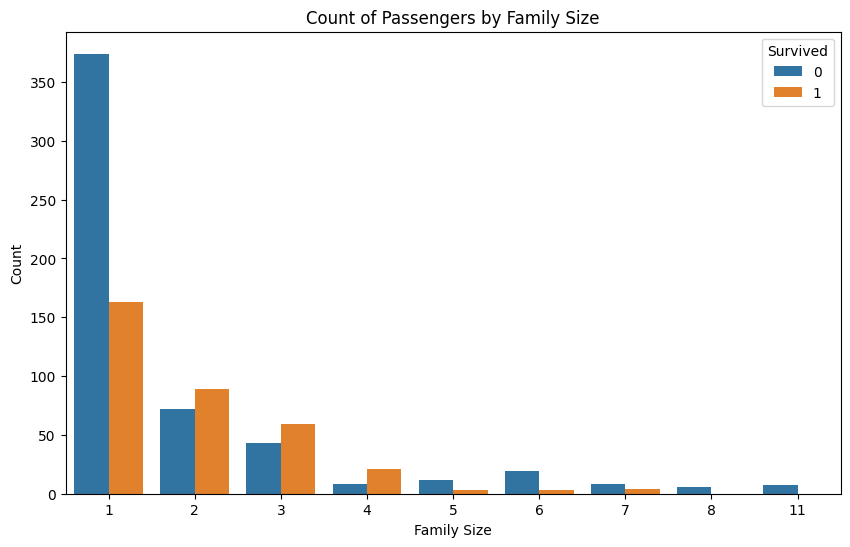

In [415]:
train['family_size'] = train['SibSp'] + train['Parch'] + 1
test['family_size'] = test['SibSp'] + test['Parch'] + 1
test['Fare'].fillna(test['Fare'].mean(), inplace=True)
print(test.isna().sum())
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='family_size', hue='Survived')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('Count of Passengers by Family Size')
plt.show()

In [416]:
print(train['Fare'].unique())

[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      15.05    39.      22.025   50.       8.4042   6.4958  10.4625
  1

In [417]:
X_train = train.drop(columns=['Survived'])
y_train = train['Survived']
X_test= test
#y_test = pd.read_csv("gender_submission.csv")['Survived']
#print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [418]:
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
'''

'\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)\n'

In [419]:
''' 
from sklearn.neighbors import KNeighborsClassifier
accuracy_test = {}
accuracy_train = {}
for n in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    pred_knn = knn.predict(X_test)
    accuracy_test[n] = knn.score(X_test, y_test)
    accuracy_train[n] = knn.score(X_train, y_train)
plt.figure(figsize=(10, 6))
plt.plot(accuracy_test.keys(), accuracy_test.values(), label='Test Accuracy')
plt.plot(accuracy_train.keys(), accuracy_train.values(), label='Train Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs Number of Neighbors')
plt.show()
'''

" \nfrom sklearn.neighbors import KNeighborsClassifier\naccuracy_test = {}\naccuracy_train = {}\nfor n in range(1, 31):\n    knn = KNeighborsClassifier(n_neighbors=n)\n    knn.fit(X_train, y_train)\n    pred_knn = knn.predict(X_test)\n    accuracy_test[n] = knn.score(X_test, y_test)\n    accuracy_train[n] = knn.score(X_train, y_train)\nplt.figure(figsize=(10, 6))\nplt.plot(accuracy_test.keys(), accuracy_test.values(), label='Test Accuracy')\nplt.plot(accuracy_train.keys(), accuracy_train.values(), label='Train Accuracy')\nplt.legend()\nplt.xlabel('Number of Neighbors')\nplt.ylabel('Accuracy')\nplt.title('KNN Accuracy vs Number of Neighbors')\nplt.show()\n"

In [420]:
#print("best accuracy:", max(accuracy_test.values()), "with n_neighbors =", max(accuracy_test, key=accuracy_test.get))

In [421]:
''' 
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(max_iter=100)
logR.fit(X_train, y_train)
pred_logr = logR.predict(X_test)
print("Logistic Regression Accuracy:", logR.score(X_test, y_test))
'''

' \nfrom sklearn.linear_model import LogisticRegression\nlogR = LogisticRegression(max_iter=100)\nlogR.fit(X_train, y_train)\npred_logr = logR.predict(X_test)\nprint("Logistic Regression Accuracy:", logR.score(X_test, y_test))\n'

In [422]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=None)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
#print("Random Forest Accuracy:", rf.score(X_test, y_test))

In [423]:
''' 
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)
pred_tree = tree_model.predict(X_test)
print("Decision Tree Accuracy:", tree_model.score(X_test, y_test))
'''

' \nfrom sklearn.tree import DecisionTreeClassifier\ntree_model = DecisionTreeClassifier(max_depth=3, random_state=42)\ntree_model.fit(X_train, y_train)\npred_tree = tree_model.predict(X_test)\nprint("Decision Tree Accuracy:", tree_model.score(X_test, y_test))\n'

In [424]:
''' 
from xgboost import XGBClassifier
model = XGBClassifier(
    n_estimators=200,       # number of trees
    max_depth=5,            # depth of each tree
    learning_rate=0.1,      # shrinkage rate
    subsample=0.8,          # sample ratio of training instances
    colsample_bytree=0.8,   # sample ratio of columns per tree
    random_state=42
)
model.fit(X_train, y_train)
pred_xgb = model.predict(X_test)
print("XGBoost Accuracy:", model.score(X_test, y_test))
'''

' \nfrom xgboost import XGBClassifier\nmodel = XGBClassifier(\n    n_estimators=200,       # number of trees\n    max_depth=5,            # depth of each tree\n    learning_rate=0.1,      # shrinkage rate\n    subsample=0.8,          # sample ratio of training instances\n    colsample_bytree=0.8,   # sample ratio of columns per tree\n    random_state=42\n)\nmodel.fit(X_train, y_train)\npred_xgb = model.predict(X_test)\nprint("XGBoost Accuracy:", model.score(X_test, y_test))\n'

In [425]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': pred_rf
})
submission.to_csv('submission.csv', index=False)